# Reading city.csv file

In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sn
%matplotlib inline
 
df = pd.read_csv("cities.txt", header='infer', sep='\t', error_bad_lines=True )
df.head(5)

,geonameid,asciiname,latitude,longitude,feature class,feature code,country code,population,elevation,dem
0,3040051,les Escaldes,42.50729,1.53414,P,PPLA,AD,15853,NaN,1033
1,3041563,Andorra la Vella,42.50779,1.52109,P,PPLC,AD,20430,NaN,1037
2,290594,Umm al Qaywayn,25.56473,55.55517,P,PPLA,AE,44411,NaN,2
3,291074,Ras al-Khaimah,25.78953,55.9432,P,PPLA,AE,115949,NaN,2
4,291696,Khawr Fakkan,25.33132,56.34199,P,PPL,AE,33575,NaN,20


## Taking subset for Cities Information with population check

In [2]:
df_subset = df[df["population"]>1000000]
# only 353 cities all over world
df_subset =df [["latitude", "longitude", "population","asciiname"]].copy()
df_subset.dtypes
df_subset.latitude = pd.to_numeric(df_subset.latitude,errors='coerce') 
df_subset.longitude = pd.to_numeric(df_subset.longitude,errors='coerce') 


df_subset.head(5)
df_subset.dtypes

latitude      float64
longitude     float64
population      int64
asciiname      object
dtype: object

# Reading Model Output File

In [91]:
f = Dataset('DC2015_base_day.nc')
sorted(f.variables.keys())


['CanopyO3_BF',
 'CanopyO3_DF',
 'CanopyO3_GR',
 'CanopyO3_IAM_CR',
 'CanopyO3_IAM_DF',
 'CanopyO3_TC',
 'DDEP_OXN_m2Grid',
 'DDEP_RDN_m2Grid',
 'DDEP_SOX_m2Grid',
 'Emis_mgm2_BioNatAPINENE',
 'Emis_mgm2_BioNatC5H8',
 'Emis_mgm2_BioNatNO',
 'Emis_mgm2_co',
 'Emis_mgm2_nh3',
 'Emis_mgm2_nox',
 'Emis_mgm2_pm25',
 'Emis_mgm2_pmco',
 'Emis_mgm2_sox',
 'Emis_mgm2_voc',
 'FstO3_BF',
 'FstO3_DF',
 'FstO3_GR',
 'FstO3_IAM_CR',
 'FstO3_IAM_DF',
 'FstO3_TC',
 'HMIX',
 'LAI_BF',
 'LAI_DF',
 'LAI_GR',
 'LAI_IAM_CR',
 'LAI_IAM_DF',
 'LAI_TC',
 'P0',
 'PSURF',
 'Polar_Stereographic',
 'SURF_MAXO3',
 'SURF_PM25water',
 'SURF_ppbC_VOC',
 'SURF_ppb_C5H8',
 'SURF_ppb_CO',
 'SURF_ppb_HCHO',
 'SURF_ppb_HNO3',
 'SURF_ppb_NH3',
 'SURF_ppb_NO',
 'SURF_ppb_NO2',
 'SURF_ppb_O3',
 'SURF_ppb_SO2',
 'SURF_ugC_PM_OM25',
 'SURF_ugN_NOX',
 'SURF_ugN_OXN',
 'SURF_ugN_RDN',
 'SURF_ug_DUST',
 'SURF_ug_DUST_NAT_C',
 'SURF_ug_DUST_NAT_F',
 'SURF_ug_DUST_ROAD_C',
 'SURF_ug_DUST_ROAD_F',
 'SURF_ug_DUST_SAH_C',
 'SURF_ug_DU

## Extracting columns from model output file

In [4]:
lati = (f.variables['lat'][:]) #159, 132
longi = (f.variables['lon'][:]) # 159, 132
time = (f.variables['time'][:]) #365
ozone = (f.variables['SURF_ppb_O3'][:])  #(365, 159, 132)



# Reshaping data 

In [5]:
ozone = np.reshape(ozone,(20988, 365 ))
lati =lati.ravel()
longi = longi.ravel()


print(np.shape(lati))
print(np.shape(ozone))


# create dataframe
ozone_df = pd.DataFrame(ozone)
ozone_df["lati"] = lati
ozone_df["longi"] = longi



(20988,)
(20988, 365)


## Some exploratory analysis

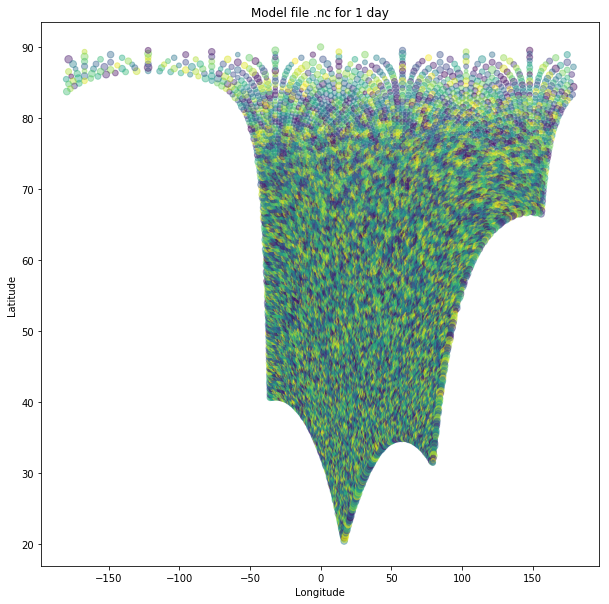

In [107]:
rng = np.random.RandomState(0)
plt.figure(figsize=(10,10))
colors = rng.rand(20988)
plt.scatter(ozone_df["longi"], ozone_df["lati"], c=colors, s=ozone_df.iloc[:,0], alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Model file .nc for 1 day")
plt.show()
# The image below shows that the data is densely populated for locations in Europe and not in US mainly.
#or in other words its highly centerd on certain geographical locations.

In [105]:
ozone_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,lati,longi
count,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,...,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000,20988.000000
mean,37.210335,37.214397,37.208881,37.199448,37.206032,37.202885,37.197845,37.192474,37.189125,37.194431,...,37.206966,37.230797,37.233181,37.224648,37.203781,37.213676,37.226494,37.213657,52.823188,35.794657
std,9.874723,9.881433,9.868547,9.863174,9.895865,9.879012,9.886984,9.895992,9.896819,9.919338,...,9.806231,9.871282,9.849676,9.824936,9.833801,9.908481,9.914526,9.877256,15.188514,45.288343
min,4.211424,4.459500,3.507108,3.063735,2.202871,2.201660,0.850756,1.174288,1.526013,1.850997,...,3.839735,2.555321,3.797281,4.358662,3.690236,4.078043,1.656549,4.151435,20.440000,-179.990000
25%,30.451121,30.455604,30.384839,30.472077,30.456482,30.455623,30.439084,30.443760,30.440833,30.463834,...,30.513839,30.556995,30.538743,30.434137,30.390803,30.403270,30.418415,30.465354,40.710000,4.160000
50%,37.525021,37.552055,37.509590,37.509659,37.541445,37.593992,37.568851,37.494429,37.507130,37.517855,...,37.560064,37.578485,37.587845,37.539087,37.499994,37.564751,37.520443,37.498531,50.990000,30.675000
75%,43.756646,43.848840,43.796613,43.790889,43.752179,43.674531,43.712329,43.694038,43.709367,43.766343,...,43.758572,43.692241,43.730968,43.806961,43.736526,43.818666,43.818327,43.746177,64.520000,67.090000
max,111.615509,106.637070,106.157799,121.530869,123.138580,137.773010,129.307373,121.600327,123.612251,119.420486,...,113.387016,122.087608,108.392525,132.100906,107.779480,129.860855,127.880280,113.644691,90.000000,178.960000


## Check for nulls

In [106]:
ozone_df.isna().any()  # seems like the data has no missing values, so need for missing values imputations

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
337      False
338      False
339      False
340      False
341      False
342      False
343      False
344      False
345      False
346      False
347      False
348      False
349      False
350      False
351      False
352      False
353      False
354      False
355      False
356      False
357      False
358      False
359      False
360      False
361      False
362      False
363      False
364      False
lati     False
longi    False
Length: 367, dtype: bool

In [6]:

ozone_df.head(5)
#ozone_df.to_csv("C:\Work\python ptc\Env Data\ozone.csv",sep="\t")


,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,lati,longi
0,40.345451,40.334724,40.322224,40.316624,40.300011,40.278393,40.285053,40.265251,40.234684,40.235561,...,36.360374,36.911446,37.809948,38.136005,37.836937,38.472015,38.893631,39.938564,40.647671,-35.674500
1,39.915474,40.563744,41.257042,41.084530,40.740948,40.751720,40.750294,40.072754,39.814137,41.722420,...,24.689756,20.583895,30.801876,34.287052,39.417587,38.850883,39.453976,41.265923,40.671364,-35.150715
2,38.377583,29.745073,28.769709,29.591192,32.532707,34.522278,33.619526,34.681347,39.211464,39.650875,...,39.099567,39.154156,39.070583,39.039799,39.111141,39.113415,38.924538,38.795815,40.691429,-34.626404
3,38.962669,38.916042,38.839752,39.232704,39.679955,39.645142,39.050007,38.021141,37.103199,35.648273,...,39.126324,40.905025,41.286274,41.408066,41.453236,41.513390,41.634758,41.715485,40.707851,-34.101654
4,41.630341,41.521595,41.444157,41.289047,40.985100,40.755856,40.524590,40.378231,40.312565,40.327759,...,39.484802,39.563786,39.464478,39.493122,39.994087,40.509899,40.915813,41.473392,40.720631,-33.576550


# For enabling city lookup

In [108]:
# The rounding off highly effects the data as then the corresponding cities i have used to get information about.


ozone_df["lati"] = ozone_df["lati"].astype(float).round(2)
ozone_df["longi"] = ozone_df["longi"].astype(float).round(2)
#------

df_subset["latitude"] = df_subset["latitude"].astype(float).round(2)
df_subset["longitude"] = df_subset["longitude"].astype(float).round(2)

df_subset.head(5)


,latitude,longitude,population,asciiname
0,42.51,1.53,15853,les Escaldes
1,42.51,1.52,20430,Andorra la Vella
2,25.56,55.56,44411,Umm al Qaywayn
3,25.79,55.94,115949,Ras al-Khaimah
4,25.33,56.34,33575,Khawr Fakkan


In [8]:
# Below mentioned check doesn't seems logically sound 
#as its an independent check on latitudes & longitudes not joint check

ozone_filtered  = ozone_df[ozone_df["lati"].isin(df_subset["latitude"]) & ozone_df["longi"].isin(df_subset["longitude"])].copy()

ozone_filtered.rename(index=str,columns={"lati":"latitude", "longi" :"longitude"},inplace=True)
print("data frame shape: ", ozone_filtered.shape)



data frame shape:  (7828, 367)


# Get City Names by lookup of lats/lons

In [9]:

data_to_check = pd.merge(ozone_filtered, df_subset, on =["latitude","longitude"])
data_to_check
# This result varies according to the latitudes / longitudes we have rounded our data

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,latitude,longitude,population,asciiname
0,41.403919,41.461346,41.375858,43.757793,43.897045,43.072426,41.898125,41.388084,40.415867,38.928196,...,42.631226,42.575924,42.678444,42.902435,42.933796,42.868259,41.58,-4.72,21762,Laguna de Duero
1,35.536335,36.462246,37.241196,37.946964,38.467796,38.702755,39.047287,38.797127,38.482735,38.326393,...,19.685591,21.610582,20.969543,20.084757,20.573532,20.594969,41.29,1.25,25092,Valls
2,42.602749,44.403820,44.494041,44.561043,43.418434,42.453472,39.760010,40.391148,38.030537,39.574451,...,36.322681,36.055264,35.745777,35.609894,35.464066,35.375553,43.88,5.78,17954,Montecatini-Terme
3,17.499268,18.994234,18.590597,18.586142,20.307419,23.169724,22.612583,23.907997,25.080706,25.696856,...,20.852142,20.424091,19.927643,19.179432,18.736958,17.808075,55.53,45.47,22361,Sergach


# Interpolation

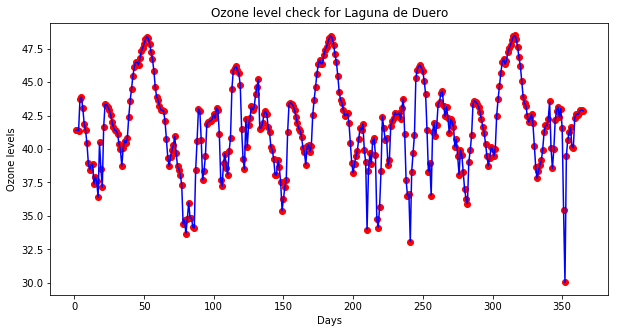

In [10]:

# interpolation check for a city
x_axis=np.arange(1,366,1)
# 365 days data

y_axis=data_to_check.iloc[0,:365]
f = interp1d(x_axis, y_axis, kind = 'linear')
x_new = np.linspace(x_axis[0], x_axis[-1],365)    

plt.figure(figsize=(10,5))
plt.plot(x_axis,y_axis, "ro",x_new, f(x_new) ,"b-")
plt.xlabel("Days")
plt.ylabel("Ozone levels")
plt.title("Ozone level check for {}".format(data_to_check.iloc[0,-1]))
plt.show()




In [11]:
highest_ozone_levels = np.argpartition(f(x_new), 7)
sample_Highest_days = pd.DataFrame(data_to_check[highest_ozone_levels[:7]])

sample_Highest_days['cities']= data_to_check["asciiname"]
sample_Highest_days['latitudes']= data_to_check["latitude"]
sample_Highest_days['longitudes']= data_to_check["longitude"]

sample_Highest_days.set_index("cities",inplace=True)
sample_Highest_days

,209,79,351,240,85,217,84,latitudes,longitudes
cities,,,,,,,,,
Laguna de Duero,33.980080,33.667465,30.027464,33.081825,34.095318,34.132362,34.151516,41.58,-4.72
Valls,26.591587,22.602423,22.893335,19.307976,17.447311,19.311810,17.564528,41.29,1.25
Montecatini-Terme,34.976326,35.737583,37.802040,36.560345,38.060249,38.580040,37.571564,43.88,5.78
Sergach,26.951944,27.951511,22.763275,22.533554,23.831865,22.752239,25.460325,55.53,45.47


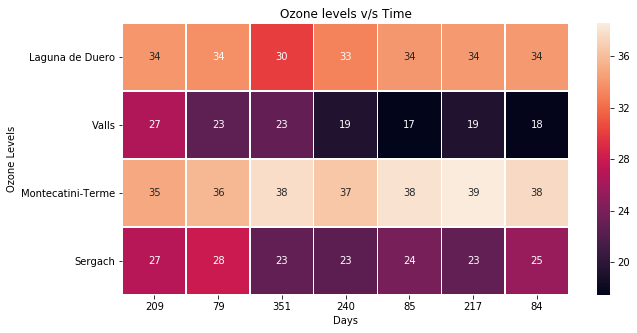

In [41]:
plt.figure(figsize=(10,5))
ax=sn.heatmap(sample_Highest_days.iloc[:,:7], annot=True, linewidths=.5)
ax.set(xlabel='Days', ylabel='Ozone Levels')
plt.title("Ozone levels v/s Time")
plt.show()

C:\Users\35850\Anaconda3\envs\tensorflow\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
No handles with labels found to put in legend.


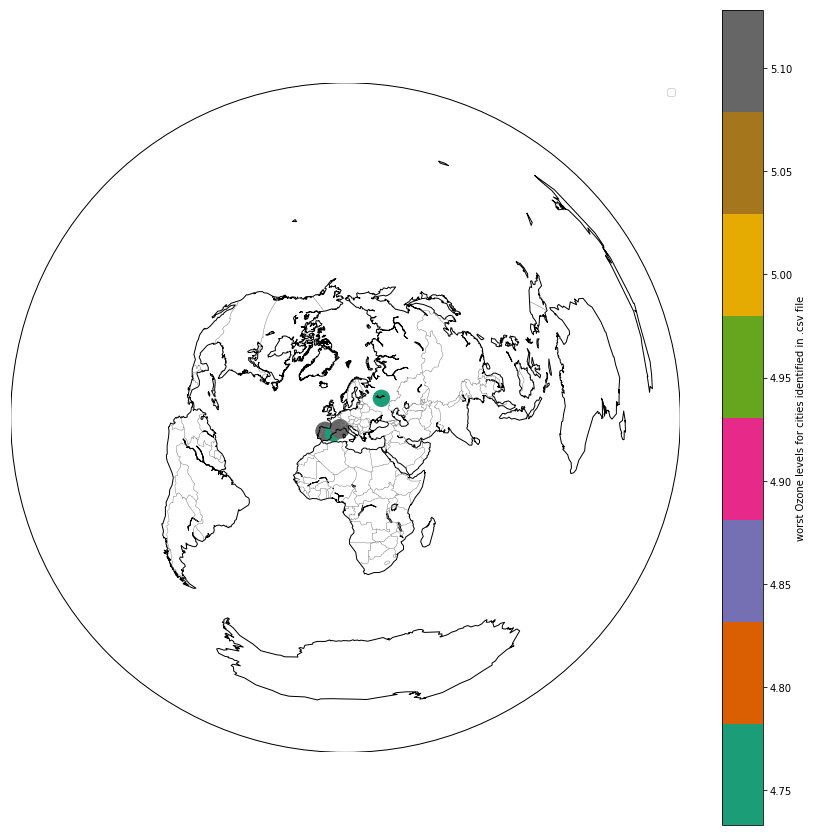

In [89]:
from PIL import Image

lat=np.array( sample_Highest_days["latitudes"] )
lon=np.array (sample_Highest_days["longitudes"])
pop= np.array (np.log2(sample_Highest_days.iloc[:,0]) )
size  = np.array(sample_Highest_days.iloc[:,0])*10

from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(15,15))
#m = Basemap(projection='lcc', resolution='h',lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)



m.drawcoastlines()
m.drawcountries(color='gray')

m.scatter(lon, lat, latlon=True,c=pop, s=size,cmap='Dark2')

plt.colorbar(label="worst Ozone levels for cities identified in .csv file")


#pop= np.array (np.log2(sample_Highest_days.iloc[:,1]) )
#size  = np.array(sample_Highest_days.iloc[:,1])*10
#m.scatter(lon, lat, latlon=True, marker="s", c="r", s=size, cmap='Dark2', alpha=0.4, label="")

#pop= np.array (np.log2(sample_Highest_days.iloc[:,2]) )
#size  = np.array(sample_Highest_days.iloc[:,2])* 3
#m.scatter(lon, lat, latlon=True, marker="^", c="b", s=size , alpha=0.5,cmap='Dark2')


plt.legend()
plt.show()